In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv("DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [4]:
df_RA = df.filter(regex='RA_') 
df_LA = df.filter(regex='LA_') 

In [5]:
df_RA.insert(3, 'activity', df['activity'])

In [6]:
df_LA.insert(3, 'activity', df['activity'])

In [7]:
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,basketBall,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,basketBall,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,basketBall,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,basketBall,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [8]:
df_RA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [9]:
df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.834459,40.1640,-15.3980,basketBall,140.063928,11.834861,0.486128,-3.441297,39.7590,-53.6520,...,-0.87575,0.210911,0.459250,-0.421162,-0.529403,0.653000,-0.879310,0.123917,0.352018,1.813520
9116,6.647402,43.9160,-22.3060,basketBall,65.655140,8.102786,0.067916,-5.140474,26.7770,-41.9160,...,-0.77618,0.143162,0.378368,-1.307983,-0.466066,0.659650,-0.835960,0.167255,0.408968,1.483683
9117,3.108810,40.2770,-10.9500,basketBall,84.701543,9.203344,1.178224,-4.881662,43.4020,-27.3490,...,0.16648,0.035696,0.188933,-0.736037,-0.286489,0.632420,-0.837640,0.109532,0.330956,0.502392
9118,5.141190,68.5920,-43.1120,basketBall,137.860050,11.741382,1.219670,-3.365847,23.6960,-34.5820,...,-0.85130,0.205452,0.453268,0.171353,-0.567578,0.264780,-0.854420,0.059971,0.244890,1.467799


In [10]:
df_LA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

C:\Users\yosim\AppData\Local\Temp\ipykernel_30080\3441972880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
C:\Users\yosim\AppData\Local\Temp\ipykernel_30080\3441972880.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [12]:
df_RA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [13]:
df_LA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [14]:
df_RA_Y=df_RA['activity']

In [15]:
df_RA_X=df_RA.drop('activity',axis=1)
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


In [16]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X, 
                                                    df_RA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [17]:
df_LA_Y = df_LA['activity']
df_LA_Y.head()

0    12
1    12
2    12
3    12
4    12
Name: activity, dtype: int32

In [18]:
df_LA_X=df_LA.drop('activity',axis=1)
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


In [19]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X, 
                                                    df_LA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [20]:
X_train_RA.shape, X_test_RA.shape, y_train_RA.shape, y_test_RA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [21]:
X_train_LA.shape, X_test_LA.shape, y_train_LA.shape, y_test_LA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [22]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [23]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_RA = np.array(y_train_RA)
train_set_RA = np.c_[X_train_RA, y_train_array_RA]

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

In [24]:
n_step = 3 

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [25]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [26]:
n_step = 3 

X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [27]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_RA = to_categorical(y_train_seq_RA)
print(y_train_seq_RA.shape)

y_test_seq_RA = to_categorical(y_test_seq_RA)
print(y_test_seq_RA.shape)


(6838, 19)
(2278, 19)


In [28]:
# Convert output variables to categorical for CNN
y_train_seq_LA = to_categorical(y_train_seq_LA)
print(y_train_seq_LA.shape)

y_test_seq_LA = to_categorical(y_test_seq_LA)
print(y_test_seq_LA.shape)

(6838, 19)
(2278, 19)


In [29]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [31]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               93696     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 19)                2451      
                                                                 
Total params: 112659 (440.07 KB)
Trainable params: 112659 (440.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20


193/193 [==============================] - 6s 11ms/step - loss: 2.0452 - accuracy: 0.3538 - val_loss: 1.3595 - val_accuracy: 0.5570
Epoch 2/20
193/193 [==============================] - 1s 6ms/step - loss: 1.0385 - accuracy: 0.6706 - val_loss: 0.9264 - val_accuracy: 0.7544
Epoch 3/20
193/193 [==============================] - 1s 6ms/step - loss: 0.7401 - accuracy: 0.7894 - val_loss: 0.7803 - val_accuracy: 0.7953
Epoch 4/20
193/193 [==============================] - 1s 7ms/step - loss: 0.5837 - accuracy: 0.8320 - val_loss: 0.7301 - val_accuracy: 0.8114
Epoch 5/20
193/193 [==============================] - 1s 6ms/step - loss: 0.4898 - accuracy: 0.8523 - val_loss: 0.6529 - val_accuracy: 0.8202
Epoch 6/20
193/193 [==============================] - 1s 5ms/step - loss: 0.4080 - accuracy: 0.8837 - val_loss: 0.6482 - val_accuracy: 0.8289
Epoch 7/20
193/193 [==============================] - 1s 6ms/step - loss: 0.3505 - accuracy: 0.8975 - val_loss: 0.6156 - val_accuracy: 0.8523
Epo

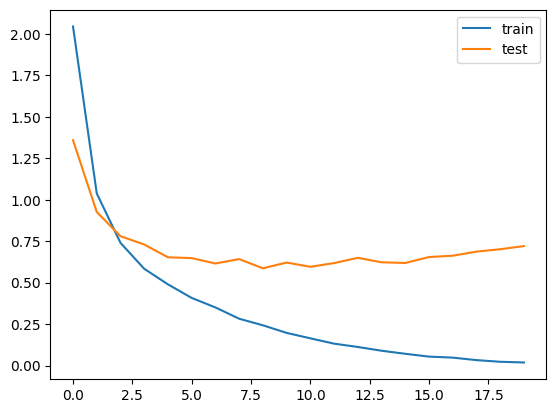

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [35]:
model.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9865


[0.0845322534441948, 0.9865458011627197]

In [36]:
model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 4ms/step - loss: 0.6338 - accuracy: 0.8674


[0.6338344812393188, 0.8674275875091553]

72/72 [==============================] - 1s 2ms/step
Confusion Matrix


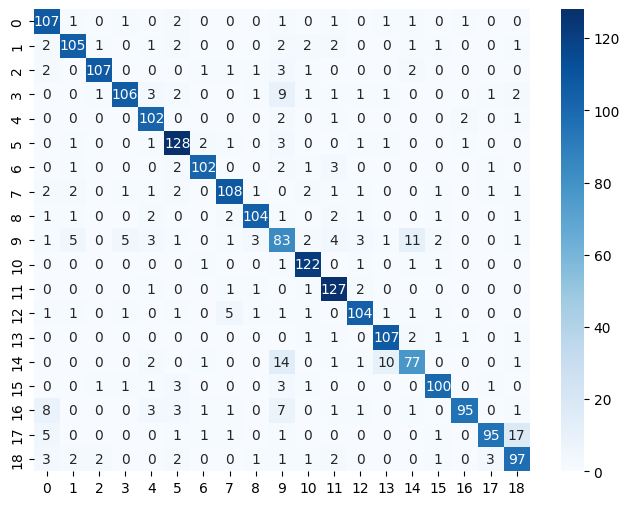

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [38]:
base_loss,base_accuracy=model.evaluate(X_test_seq_RA, y_test_seq_RA)

model_file='RA_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.8674
model saved at  RA_Model.h5
Accuracy >86.742759
Base Loss >0.63


C:\Users\yosim\AppData\Local\Temp\ipykernel_30080\3109341393.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, model_file, include_optimizer=False)


In [39]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [40]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 19)                2451      
                                                                 
Total params: 112659 (440.07 KB)
Trainable params: 112659 (440.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history2 = model2.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 4s 9ms/step - loss: 1.9700 - accuracy: 0.3814 - val_loss: 1.2699 - val_accuracy: 0.5629
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 0.9859 - accuracy: 0.6857 - val_loss: 0.8640 - val_accuracy: 0.7251
Epoch 3/20
193/193 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.7902 - val_loss: 0.7041 - val_accuracy: 0.7880
Epoch 4/20
193/193 [==============================] - 1s 5ms/step - loss: 0.5185 - accuracy: 0.8494 - val_loss: 0.5986 - val_accuracy: 0.8377
Epoch 5/20
193/193 [==============================] - 1s 7ms/step - loss: 0.4224 - accuracy: 0.8759 - val_loss: 0.5784 - val_accuracy: 0.8406
Epoch 6/20
193/193 [==============================] - 1s 5ms/step - loss: 0.3389 - accuracy: 0.9007 - val_loss: 0.5469 - val_accuracy: 0.8582
Epoch 7/20
193/193 [==============================] - 1s 6ms/step - loss: 0.2861 - accuracy: 0.9136 - val_loss: 0.5461 - val_accuracy: 0.8436
Epoch 

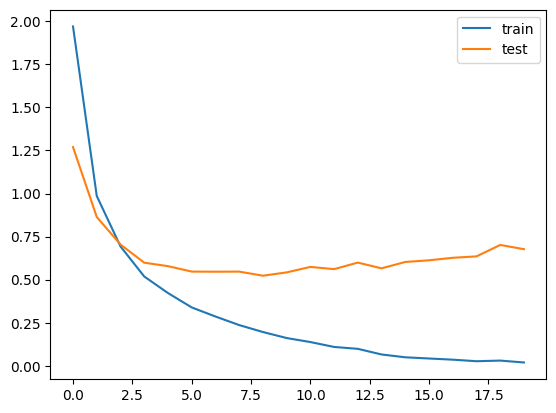

In [42]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [43]:
model2.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9808


[0.09392263740301132, 0.9808423519134521]

In [44]:
model2.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.8758


[0.6351040005683899, 0.87576824426651]

72/72 [==============================] - 1s 4ms/step
Confusion Matrix


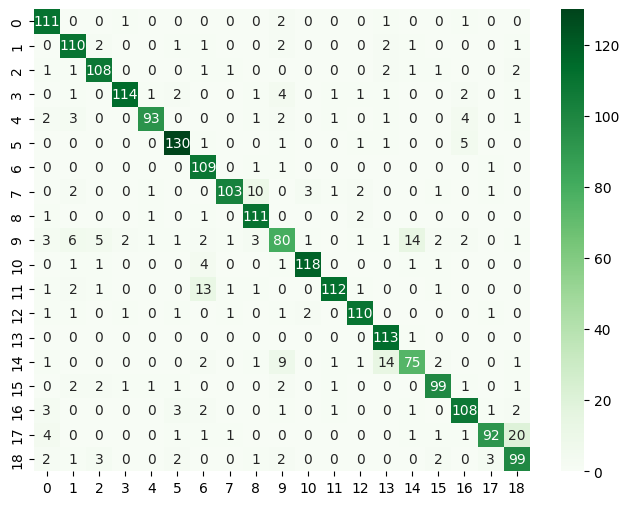

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [46]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_LA, y_test_seq_LA)

model_file2='LA_Model.h5'
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.8758
model saved at  LA_Model.h5
Accuracy >87.576824
Base Loss >0.64


C:\Users\yosim\AppData\Local\Temp\ipykernel_30080\1927367011.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model2, model_file2, include_optimizer=False)


# Pre-trained-model

In [47]:
# https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [48]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file2)

In [49]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 1s 2ms/step - loss: 0.6351 - accuracy: 0.8758


[0.6351040005683899, 0.87576824426651]

In [50]:
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 5.7963 - accuracy: 0.2230


[5.796310901641846, 0.223002627491951]

In [51]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [52]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [53]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(19, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 19)                4883      
                                                                 
Total params: 148115 (578.57 KB)
Trainable params: 37907 (148.07 KB)
Non-trainable params: 110208 (430.50 KB)
_________________________________________________________________


In [54]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_1,False
1,<keras.src.layers.core.dense.Dense object at 0...,dense_2,False
2,<keras.src.layers.core.dense.Dense object at 0...,dense_4,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_5,True


In [55]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 4s 8ms/step - loss: 1.7851 - accuracy: 0.4415 - val_loss: 1.5269 - val_accuracy: 0.5365
Epoch 2/20
193/193 [==============================] - 1s 5ms/step - loss: 1.4219 - accuracy: 0.5458 - val_loss: 1.4241 - val_accuracy: 0.5614
Epoch 3/20
193/193 [==============================] - 1s 4ms/step - loss: 1.3172 - accuracy: 0.5860 - val_loss: 1.3832 - val_accuracy: 0.5512
Epoch 4/20
193/193 [==============================] - 1s 5ms/step - loss: 1.2390 - accuracy: 0.6098 - val_loss: 1.3405 - val_accuracy: 0.5585
Epoch 5/20
193/193 [==============================] - 1s 5ms/step - loss: 1.1870 - accuracy: 0.6173 - val_loss: 1.3106 - val_accuracy: 0.5848
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 1.1379 - accuracy: 0.6310 - val_loss: 1.2710 - val_accuracy: 0.6082
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 1.0964 - accuracy: 0.6536 - val_loss: 1.2307 - val_accuracy: 0.6082
Epoch 

In [56]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 4ms/step - loss: 1.1769 - accuracy: 0.6313


[1.1769472360610962, 0.6312555074691772]

# Fine Tunning 미세 조정

In [57]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [58]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm_1,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense_2,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_4,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_5,True


In [59]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 4s 6ms/step - loss: 0.7070 - accuracy: 0.7753 - val_loss: 0.8663 - val_accuracy: 0.7442
Epoch 2/20
193/193 [==============================] - 1s 5ms/step - loss: 0.4750 - accuracy: 0.8542 - val_loss: 0.8365 - val_accuracy: 0.7778
Epoch 3/20
193/193 [==============================] - 1s 7ms/step - loss: 0.3620 - accuracy: 0.8872 - val_loss: 0.7374 - val_accuracy: 0.7865
Epoch 4/20
193/193 [==============================] - 1s 6ms/step - loss: 0.2780 - accuracy: 0.9162 - val_loss: 0.7381 - val_accuracy: 0.7909
Epoch 5/20
193/193 [==============================] - 1s 7ms/step - loss: 0.2506 - accuracy: 0.9191 - val_loss: 0.6782 - val_accuracy: 0.8377
Epoch 6/20
193/193 [==============================] - 1s 7ms/step - loss: 0.1792 - accuracy: 0.9459 - val_loss: 0.7064 - val_accuracy: 0.8436
Epoch 7/20
193/193 [==============================] - 1s 6ms/step - loss: 0.1554 - accuracy: 0.9530 - val_loss: 0.6856 - val_accuracy: 0.8392
Epoch 

In [60]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 4ms/step - loss: 0.9172 - accuracy: 0.8477


[0.9172422289848328, 0.8476734161376953]

# Pre-trained-model-RA

In [61]:
# https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [62]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [63]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 1s 2ms/step - loss: 0.6338 - accuracy: 0.8674


[0.6338344812393188, 0.8674275875091553]

In [64]:
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 2ms/step - loss: 6.6601 - accuracy: 0.2735


[6.660116195678711, 0.2734855115413666]

In [65]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [66]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [67]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(19, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               93696     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 19)                4883      
                                                                 
Total params: 148115 (578.57 KB)
Trainable params: 37907 (148.07 KB)
Non-trainable params: 110208 (430.50 KB)
_________________________________________________________________


In [68]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm,False
1,<keras.src.layers.core.dense.Dense object at 0...,dense,False
2,<keras.src.layers.core.dense.Dense object at 0...,dense_6,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_7,True


In [69]:
history3 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 3s 5ms/step - loss: 1.5842 - accuracy: 0.5005 - val_loss: 1.2994 - val_accuracy: 0.5687
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.1876 - accuracy: 0.6120 - val_loss: 1.1939 - val_accuracy: 0.6140
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 1.0947 - accuracy: 0.6435 - val_loss: 1.1463 - val_accuracy: 0.6418
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 1.0217 - accuracy: 0.6698 - val_loss: 1.0906 - val_accuracy: 0.6711
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 0.9713 - accuracy: 0.6826 - val_loss: 1.1007 - val_accuracy: 0.6637
Epoch 6/20
193/193 [==============================] - 1s 5ms/step - loss: 0.9312 - accuracy: 0.7008 - val_loss: 1.0892 - val_accuracy: 0.6652
Epoch 7/20
193/193 [==============================] - 1s 5ms/step - loss: 0.9001 - accuracy: 0.7088 - val_loss: 1.0326 - val_accuracy: 0.6915
Epoch 

In [70]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 4ms/step - loss: 1.0357 - accuracy: 0.6997


[1.035736322402954, 0.6997365951538086]

# Fine Tunning 미세 조정

In [71]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [72]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x00...,lstm,True
1,<keras.src.layers.core.dense.Dense object at 0...,dense,True
2,<keras.src.layers.core.dense.Dense object at 0...,dense_6,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_7,True


In [73]:
history3 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 4s 10ms/step - loss: 0.5961 - accuracy: 0.8061 - val_loss: 0.8317 - val_accuracy: 0.7778
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.8681 - val_loss: 0.7283 - val_accuracy: 0.8041
Epoch 3/20
193/193 [==============================] - 1s 6ms/step - loss: 0.3028 - accuracy: 0.9087 - val_loss: 0.6502 - val_accuracy: 0.8114
Epoch 4/20
193/193 [==============================] - 1s 7ms/step - loss: 0.2535 - accuracy: 0.9194 - val_loss: 0.6631 - val_accuracy: 0.8260
Epoch 5/20
193/193 [==============================] - 1s 7ms/step - loss: 0.2113 - accuracy: 0.9348 - val_loss: 0.7146 - val_accuracy: 0.8275
Epoch 6/20
193/193 [==============================] - 1s 6ms/step - loss: 0.1733 - accuracy: 0.9457 - val_loss: 0.7012 - val_accuracy: 0.8231
Epoch 7/20
193/193 [==============================] - 1s 7ms/step - loss: 0.1515 - accuracy: 0.9493 - val_loss: 0.6859 - val_accuracy: 0.8465
Epoch

In [74]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 2ms/step - loss: 0.8853 - accuracy: 0.8424


[0.8853356838226318, 0.8424056172370911]